Correlation Exercise

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:

google_sheet_url ="https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/export?format=xlsx"
#df = pd.read_excel(google_sheet_url, engine='openpyxl')
df = pd.ExcelFile(google_sheet_url)
print(df.sheet_names)

['amsterdam_weekdays', 'amsterdam_weekends', 'athens_weekdays', 'athens_weekends', 'berlin_weekends', 'berlin_weekdays', 'barcelona_weekdays', 'barcelona_weekends', 'budapest_weekdays', 'budapest_weekends', 'lisbon_weekdays', 'lisbon_weekends', 'london_weekdays', 'london_weekends', 'paris_weekdays', 'paris_weekends', 'rome_weekdays', 'rome_weekends', 'vienna_weekdays', 'vienna_weekends']


In [4]:
sheet_names = df.sheet_names
all_sheets = [df.parse(sheet).assign(sheet_name=sheet) for sheet in sheet_names]
merged_df = pd.concat(all_sheets, ignore_index=True)
print(merged_df.head())

   Unnamed: 0     realSum     room_type  room_shared  room_private  \
0           0  194.033698  Private room        False          True   
1           1  344.245776  Private room        False          True   
2           2  264.101422  Private room        False          True   
3           3  433.529398  Private room        False          True   
4           4  485.552926  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0                2              False      1    0                  10  ...   
1                4              False      0    0                   8  ...   
2                2              False      0    1                   9  ...   
3                4              False      0    1                   9  ...   
4                2               True      0    0                  10  ...   

   bedrooms      dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0         1  5.022964    2.53938

In [5]:
# Select only numeric columns
numeric_df = merged_df.select_dtypes(include=["number"])
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

In [6]:
# Pearson correlation matrix
pearson_corr = numeric_df.corr(method='pearson')
print("Pearson Correlation Matrix:")
print(pearson_corr)

Pearson Correlation Matrix:
                            Unnamed: 0   realSum  person_capacity     multi  \
Unnamed: 0                    1.000000  0.010863        -0.001816 -0.001999   
realSum                       0.010863  1.000000         0.203077 -0.052926   
person_capacity              -0.001816  0.203077         1.000000 -0.054326   
multi                        -0.001999 -0.052926        -0.054326  1.000000   
biz                           0.018735  0.037144         0.110668 -0.470725   
cleanliness_rating           -0.049342 -0.006082         0.003256  0.041064   
guest_satisfaction_overall   -0.062290 -0.001888         0.005181  0.054254   
bedrooms                      0.019509  0.221653         0.560627 -0.000659   
dist                          0.186218 -0.044725        -0.128488  0.033426   
metro_dist                    0.024200 -0.061025        -0.037267  0.043365   
attr_index                    0.084314  0.178228         0.028394  0.006319   
attr_index_norm         

In [7]:
# Spearman correlation matrix
spearman_corr = numeric_df.corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(spearman_corr)


Spearman Correlation Matrix:
                            Unnamed: 0   realSum  person_capacity     multi  \
Unnamed: 0                    1.000000  0.003220         0.009986 -0.009528   
realSum                       0.003220  1.000000         0.295154 -0.091498   
person_capacity               0.009986  0.295154         1.000000 -0.056689   
multi                        -0.009528 -0.091498        -0.056689  1.000000   
biz                           0.022234  0.079588         0.107951 -0.470725   
cleanliness_rating           -0.023232  0.005276        -0.000492  0.044292   
guest_satisfaction_overall   -0.010325  0.013955         0.003463  0.044331   
bedrooms                      0.023569  0.226107         0.547555 -0.000317   
dist                          0.224701 -0.060627        -0.139487  0.028943   
metro_dist                    0.035318 -0.132895        -0.015364  0.057070   
attr_index                    0.101322  0.384855        -0.001241  0.000118   
attr_index_norm       

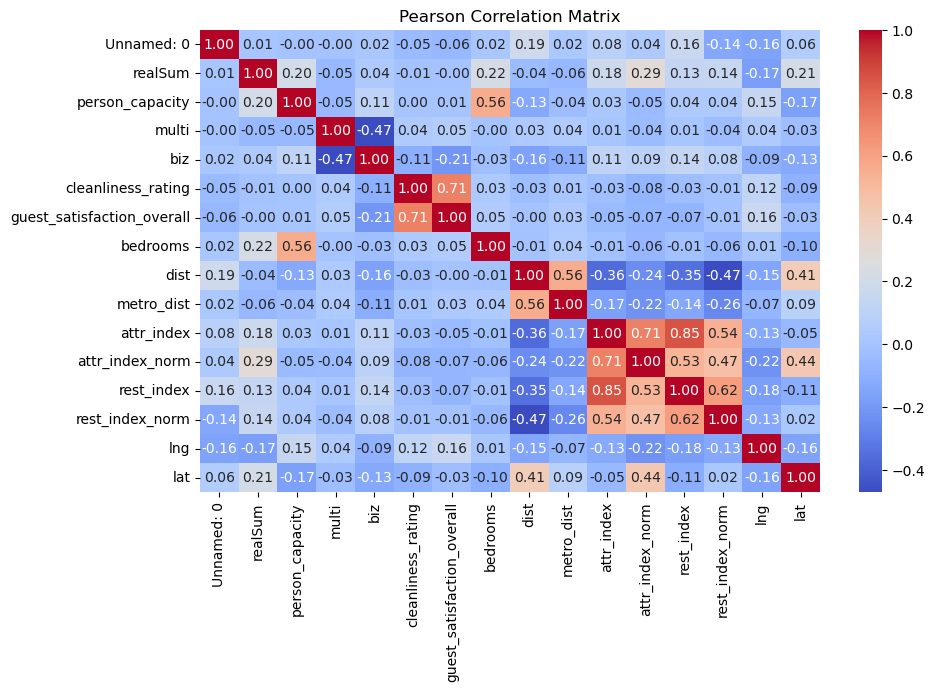

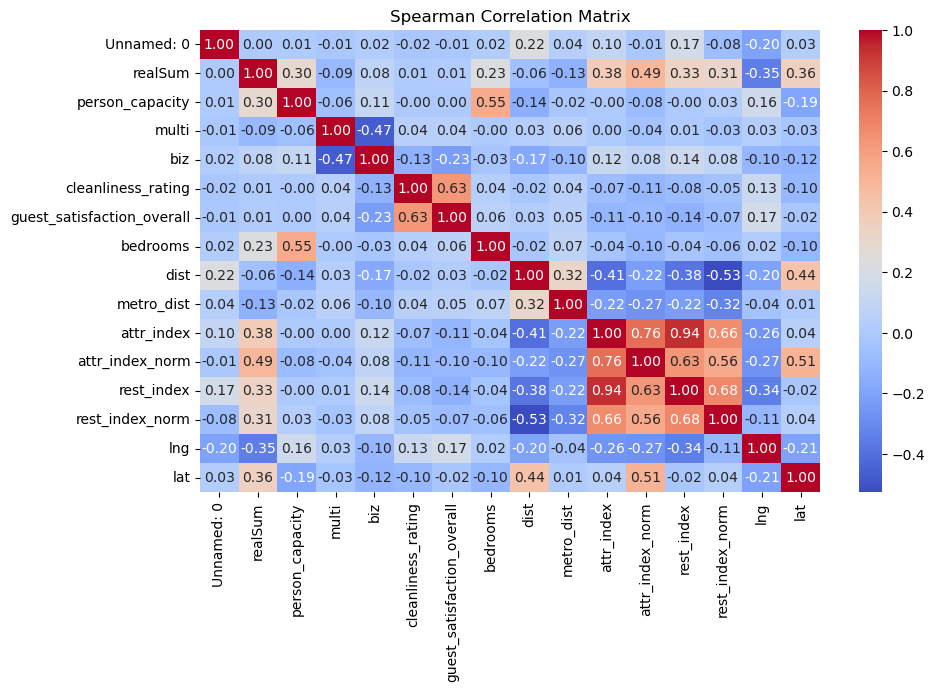

In [8]:
# Pearson heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.show()

# Spearman heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Matrix")
plt.show()

In [9]:
# Find strong correlations (absolute value > 0.6, exclude self-correlation)
strong_corrs = spearman_corr[(spearman_corr.abs() > 0.6) & (spearman_corr != 1.0)]

print("Strong Correlations:")
print(strong_corrs)

Strong Correlations:
                            Unnamed: 0  realSum  person_capacity  multi  biz  \
Unnamed: 0                         NaN      NaN              NaN    NaN  NaN   
realSum                            NaN      NaN              NaN    NaN  NaN   
person_capacity                    NaN      NaN              NaN    NaN  NaN   
multi                              NaN      NaN              NaN    NaN  NaN   
biz                                NaN      NaN              NaN    NaN  NaN   
cleanliness_rating                 NaN      NaN              NaN    NaN  NaN   
guest_satisfaction_overall         NaN      NaN              NaN    NaN  NaN   
bedrooms                           NaN      NaN              NaN    NaN  NaN   
dist                               NaN      NaN              NaN    NaN  NaN   
metro_dist                         NaN      NaN              NaN    NaN  NaN   
attr_index                         NaN      NaN              NaN    NaN  NaN   
attr_index_norm    

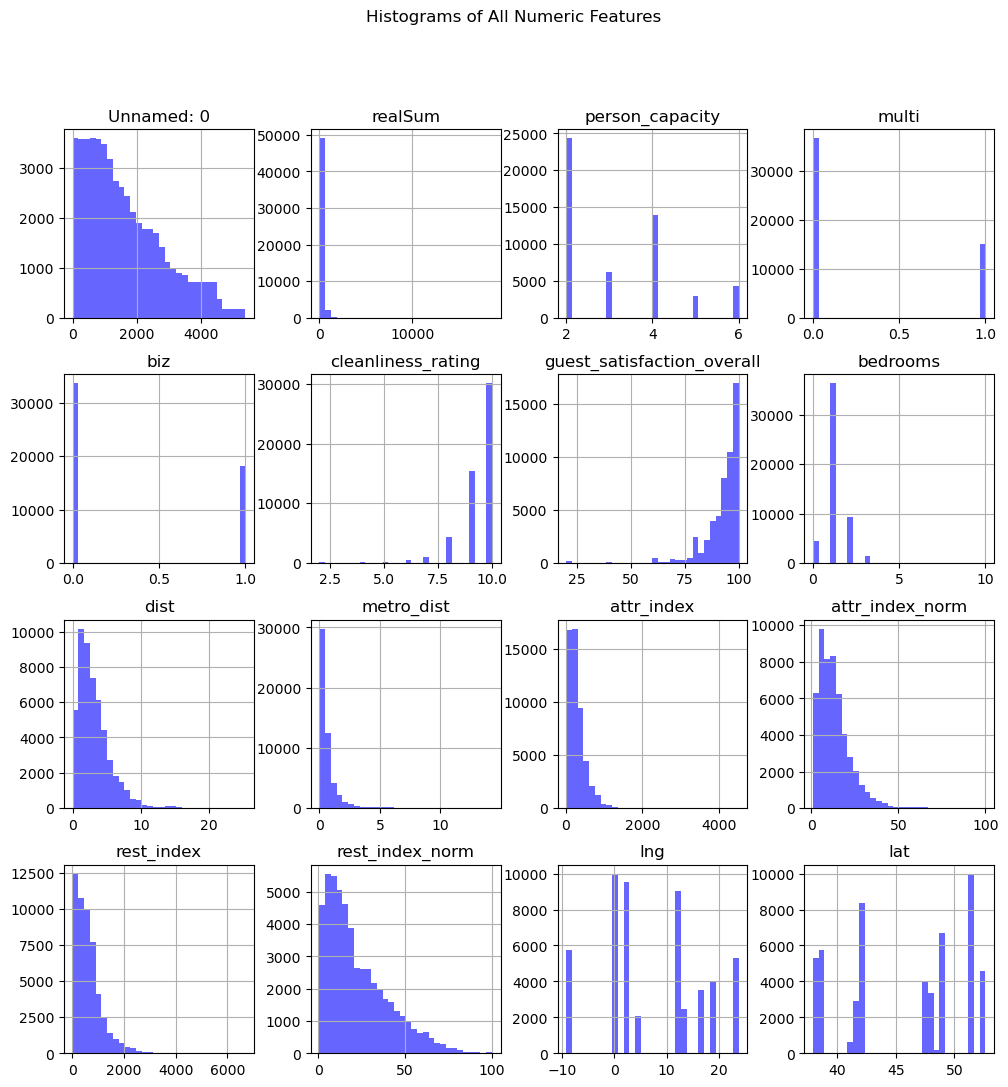

In [10]:
# Plot histograms for all numeric columns
numeric_df.hist(bins=30, figsize=(12, 12), color='blue', alpha=0.6)
plt.suptitle('Histograms of All Numeric Features')
plt.show()

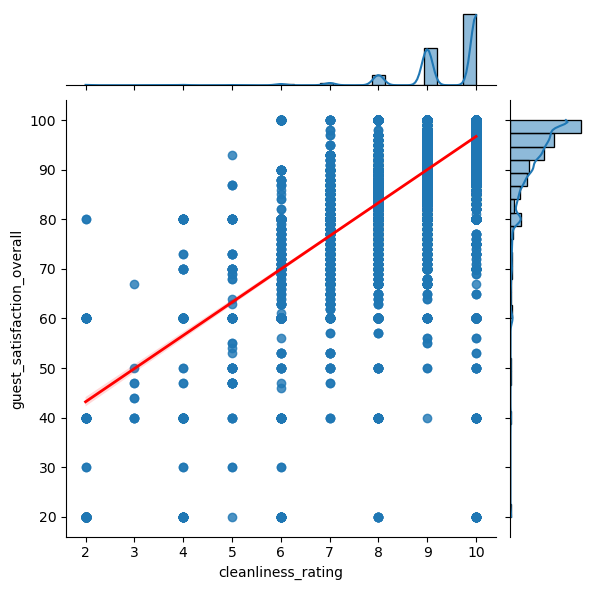

In [11]:
# Joint plot with histograms for Feature1 and Feature2
sns.jointplot(
    x='cleanliness_rating', 
    y='guest_satisfaction_overall', 
    data=numeric_df, 
    kind='reg',  # Adds a regression line
    marginal_kws=dict(bins=30, fill=True),
    line_kws={'color': 'red', 'linewidth': 2}  # Customize regression line
)
plt.show()


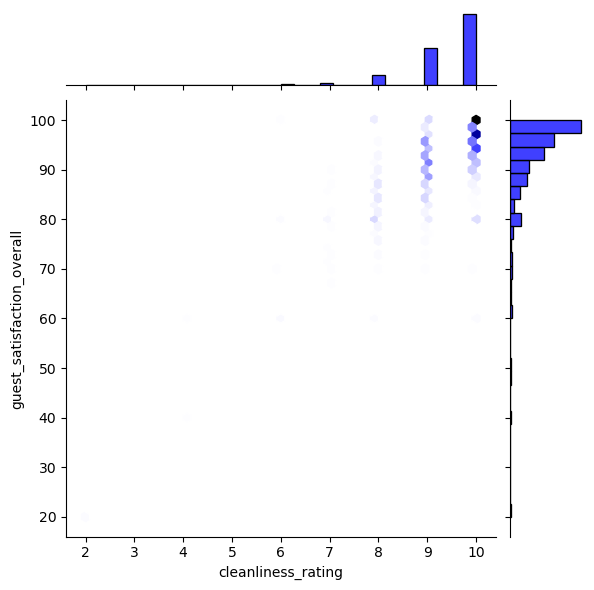

In [12]:
sns.jointplot(
    x='cleanliness_rating', 
    y='guest_satisfaction_overall', 
    data=numeric_df, 
    kind='hex',  # Hexagonal bins for density
    marginal_kws=dict(bins=30, fill=True),
    color="blue"  
)
plt.show()

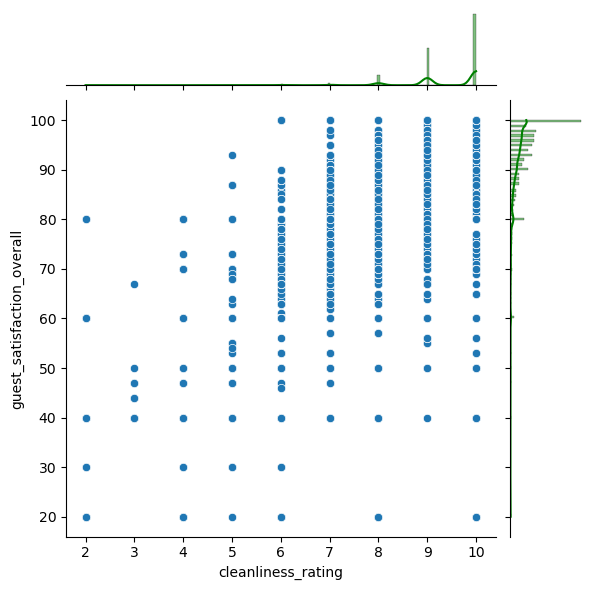

In [13]:
sns.jointplot(
    x='cleanliness_rating', 
    y='guest_satisfaction_overall', 
    data=numeric_df, 
    kind='scatter', 
    marginal_kws=dict(kde=True, fill=True, color='green')  # Marginal KDE plot
)
plt.show()

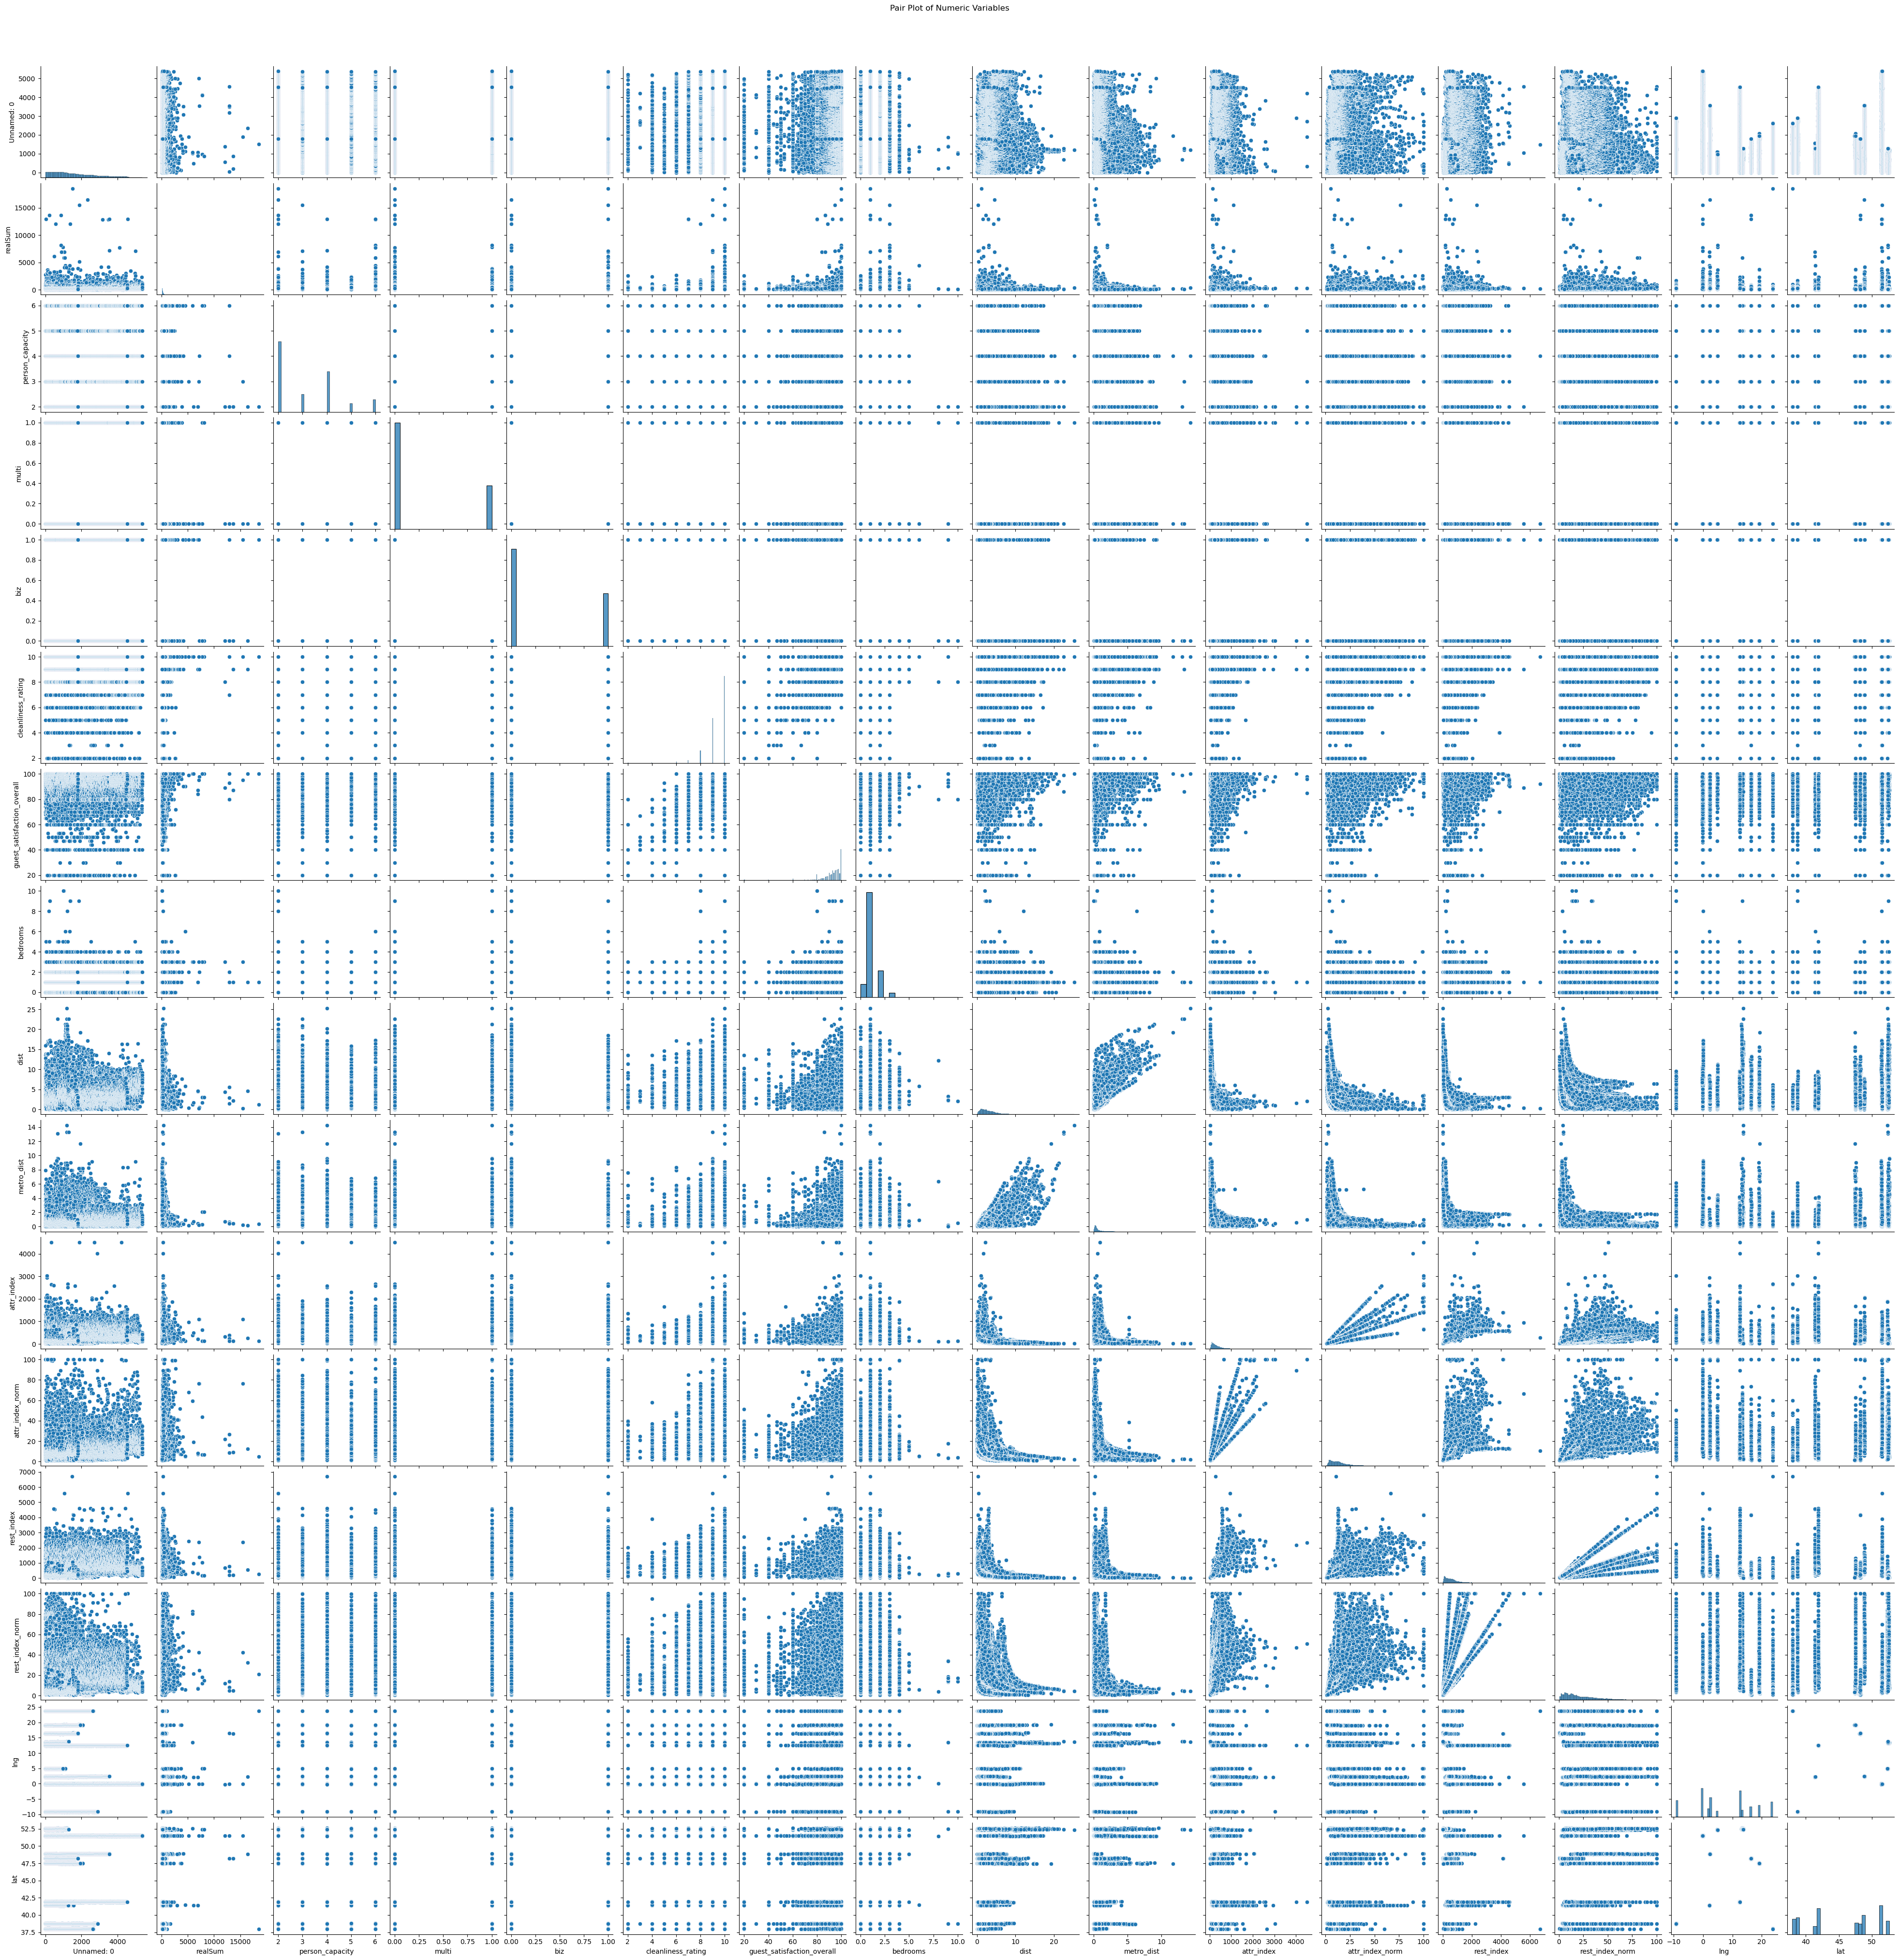

In [16]:
sns.pairplot(numeric_df, kind='scatter', diag_kind='hist')
plt.suptitle("Pair Plot of Numeric Variables", y=1.02)
plt.show()